# GATE output formats and Python

## GATE can output information in different formats:

### From actors, examples:
* SimulationStatisticActor : store number of events, tracks, steps in **ASCII**
* DoseActor : store absorbed dose in **ASCII, ROOT for 1D and 2D**, and **.hdr, .mhd for 3D**
* EnergySpectrumActor: store energy distribution in **ROOT**
* PhaseSpaceActor: store the particle's type, position, direction, energy, ... in **ROOT, IAEA, NumPy**

See https://opengate.readthedocs.io/en/latest/tools_to_interact_with_the_simulation_actors.html

### From imaging "systems" (scanner, CT, SPECT, PET, ...):
* to record interactions: hits, singles, coincidences in **ASCII, binary, ROOT, NumPy**
* to save images: projections and sinograms in **.hdr, .mhd**

See https://opengate.readthedocs.io/en/latest/data_output_management.html

## In summary, when using GATE you will produce one of these output formats:
* ASCII output
* Binary output
* Images (.mhd, .hdr) output
* ROOT tree output
* NumPy tree output (new!)

#### We will first have a look at a GATE example to understand these outputs:
* open a terminal and go to the folder gate_outputs/ex_beam
* look at the different files and open mac/main.mac
* look at all the sections and in particular to the ouputs section
* run the example with  
`Gate --qt mac/main.mac`
* check the output folder and the different files produced

#### We will now analyse each output with this Python notebook !

# From The Notebook

From the notebook, we can execute shell commands, like in a regular terminal.

We can list files with the command `ls`: 

In [358]:
ls ex_beam/

data/  mac/  output/  README.md


In [359]:
ls ex_beam/mac/

actors.mac  main.mac  main_waterboxHits.mac  verbose.mac  visu.mac


Some commands can be executed directly : 

In [360]:
cat ex_beam/mac/main.mac

#=====================================================
# VERBOSITY
#=====================================================

/control/execute                        mac/verbose.mac

#=====================================================
# GEOMETRY
#=====================================================

/gate/geometry/setMaterialDatabase      data/GateMaterials.db

# World
/gate/world/geometry/setXLength         1 m
/gate/world/geometry/setYLength         1 m
/gate/world/geometry/setZLength         1 m
/gate/world/setMaterial                 Air

/gate/world/daughters/name              scanner
/gate/world/daughters/insert            box
/gate/scanner/geometry/setXLength         1 m
/gate/scanner/geometry/setYLength         1 m
/gate/scanner/geometry/setZLength         1 m
/gate/scanner/setMaterial                 Air



# EPID
/gate/scanner/daughters/name              EPID
/gate/scanner/daughters/insert            box
/gate/EPID/geometry/setXLength       40 cm
/gate/EPID/geometry/setYLeng

But some can not and we need to prefix command with a `!` 

In [361]:
du

NameError: name 'du' is not defined

In [362]:
!du

16	./ex_beam/data
28	./ex_beam/mac
1640156	./ex_beam/output
1640204	./ex_beam
240	./.ipynb_checkpoints
1640648	.


Execute command from notebook is powerfull, we can use the output from the command and use it in the notebook: 

In [363]:
a = !du
print(a)

['16\t./ex_beam/data', '28\t./ex_beam/mac', '1640156\t./ex_beam/output', '1640204\t./ex_beam', '240\t./.ipynb_checkpoints', '1640648\t.']


## Exercice: 
Write a python function which print folder name and its size by using output of the command `du`

In [418]:
# write code here

In [365]:
f('ex_beam/')

size	 16 kB		 0 MB ex_beam/data
size	 28 kB		 0 MB ex_beam/mac
size	 1640156 kB		 1601 MB ex_beam/output
size	 1640204 kB		 1601 MB ex_beam/


## run the example

In [366]:
cd ex_beam/

/home/mdupont/Documents/DocumentsSync/IR/missions/by_year/2021/2021_03_09_Python GATE School/mathieu/gate-python-training/gate_outputs/ex_beam


In [367]:
ls

data/  mac/  output/  README.md


In [368]:
%%time
!Gate mac/main.mac

plop
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecol


hIoni:  for proton  SubType=2
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.05 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50618


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.05 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 GeV 

In [369]:
ls output/

1D-depth-Edep-Squared.txt      3D-Edep-Squared.raw      list-Run.bin
1D-depth-Edep.txt              3D-Edep-Uncertainty.mhd  simu-stats.txt
1D-depth-Edep-Uncertainty.txt  3D-Edep-Uncertainty.raw  tree.hits.npy
3D-Edep.mhd                    3D-NbOfHits.mhd          tree.hits.root
3D-Edep.raw                    3D-NbOfHits.raw          tree_water.hits.npy
3D-Edep-Squared.mhd            list-Hits.bin            tree_water.hits.root


In [370]:
cd ..

/home/mdupont/Documents/DocumentsSync/IR/missions/by_year/2021/2021_03_09_Python GATE School/mathieu/gate-python-training/gate_outputs


## GATE Numpy Tree output 
GATE simulations can now output information on interactions occuring in a detector in a new format: the NumPy .npy Python format. This as several advantages:
* data is easily open in Python.
* data is saved as a [Structured Arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) which makes the access to variables very easy.

cf: https://opengate.readthedocs.io/en/latest/data_output_management.html#new-unified-tree-output-root-numpy-and-more

In [371]:
import numpy as np

In [372]:
data = np.load("ex_beam/output/tree.hits.npy")
print("Number of particles: ", len(data))

Number of particles:  44129


In [373]:
import matplotlib.pyplot as plt
%matplotlib inline

In [374]:
data.dtype

dtype([('PDGEncoding', '<i4'), ('trackID', '<i4'), ('parentID', '<i4'), ('trackLocalTime', '<f8'), ('time', '<f8'), ('runID', '<i4'), ('eventID', '<i4'), ('sourceID', '<i4'), ('primaryID', '<i4'), ('posX', '<f4'), ('posY', '<f4'), ('posZ', '<f4'), ('localPosX', '<f4'), ('localPosY', '<f4'), ('localPosZ', '<f4'), ('momDirX', '<f4'), ('momDirY', '<f4'), ('momDirZ', '<f4'), ('edep', '<f4'), ('stepLength', '<f4'), ('trackLength', '<f4'), ('rotationAngle', '<f4'), ('axialPos', '<f4'), ('processName', 'S32'), ('comptVolName', 'S32'), ('RayleighVolName', 'S32'), ('volumeID[0]', '<i4'), ('volumeID[1]', '<i4'), ('volumeID[2]', '<i4'), ('volumeID[3]', '<i4'), ('volumeID[4]', '<i4'), ('volumeID[5]', '<i4'), ('volumeID[6]', '<i4'), ('volumeID[7]', '<i4'), ('volumeID[8]', '<i4'), ('volumeID[9]', '<i4'), ('sourcePosX', '<f4'), ('sourcePosY', '<f4'), ('sourcePosZ', '<f4'), ('nPhantomCompton', '<i4'), ('nCrystalCompton', '<i4'), ('nPhantomRayleigh', '<i4'), ('nCrystalRayleigh', '<i4'), ('', '<i4'), ('

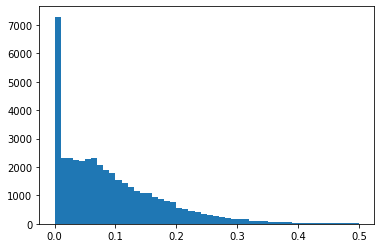

In [375]:
plt.hist(data['edep'], bins=50, range=(0,0.5));

## GATE ROOT Tree output

In [376]:
import uproot
f = uproot.open('ex_beam/output/tree.hits.root')

# all trees, branches and leaves names are accessible through the method keys()
print('Trees in the file:')
print(f.keys())
print()
print('Leaves (variables) in the Tree:')
print(f['tree'].keys())

# all variables are accessible through the method arrays() 
# data = f['tree'].arrays()
#data = f['tree'].pandas.df().to_records() #with uproot3
data =  f['tree'].arrays(library='pd').to_records()

print()
print('Number of particles:', len(data))

Trees in the file:
['tree;1']

Leaves (variables) in the Tree:
['PDGEncoding', 'trackID', 'parentID', 'trackLocalTime', 'time', 'runID', 'eventID', 'sourceID', 'primaryID', 'posX', 'posY', 'posZ', 'localPosX', 'localPosY', 'localPosZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'stepLength', 'trackLength', 'rotationAngle', 'axialPos', 'processName', 'comptVolName', 'RayleighVolName', 'volumeID[0]', 'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]', 'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]', 'volumeID[9]', 'sourcePosX', 'sourcePosY', 'sourcePosZ', 'nPhantomCompton', 'nCrystalCompton', 'nPhantomRayleigh', 'nCrystalRayleigh', '', 'level1ID', 'level2ID', 'level3ID', 'level4ID', 'level5ID', 'photonID']

Number of particles: 44129


In [377]:
data.dtype

dtype((numpy.record, [('index', '<i8'), ('PDGEncoding', '<i4'), ('trackID', '<i4'), ('parentID', '<i4'), ('trackLocalTime', '<f8'), ('time', '<f8'), ('runID', '<i4'), ('eventID', '<i4'), ('sourceID', '<i4'), ('primaryID', '<i4'), ('posX', '<f4'), ('posY', '<f4'), ('posZ', '<f4'), ('localPosX', '<f4'), ('localPosY', '<f4'), ('localPosZ', '<f4'), ('momDirX', '<f4'), ('momDirY', '<f4'), ('momDirZ', '<f4'), ('edep', '<f4'), ('stepLength', '<f4'), ('trackLength', '<f4'), ('rotationAngle', '<f4'), ('axialPos', '<f4'), ('processName', 'O'), ('comptVolName', 'O'), ('RayleighVolName', 'O'), ('volumeID[0]', '<i4'), ('volumeID[1]', '<i4'), ('volumeID[2]', '<i4'), ('volumeID[3]', '<i4'), ('volumeID[4]', '<i4'), ('volumeID[5]', '<i4'), ('volumeID[6]', '<i4'), ('volumeID[7]', '<i4'), ('volumeID[8]', '<i4'), ('volumeID[9]', '<i4'), ('sourcePosX', '<f4'), ('sourcePosY', '<f4'), ('sourcePosZ', '<f4'), ('nPhantomCompton', '<i4'), ('nCrystalCompton', '<i4'), ('nPhantomRayleigh', '<i4'), ('nCrystalRayleig

### Exercice

Analyse return of `f['tree'].arrays(library='np')` and use it to make a structured array. 

https://numpy.org/doc/stable/user/basics.rec.html

In [378]:
d = f['tree'].arrays(library='np')

It is a dictionnary of array

In [379]:
d.keys()

dict_keys(['PDGEncoding', 'trackID', 'parentID', 'trackLocalTime', 'time', 'runID', 'eventID', 'sourceID', 'primaryID', 'posX', 'posY', 'posZ', 'localPosX', 'localPosY', 'localPosZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'stepLength', 'trackLength', 'rotationAngle', 'axialPos', 'processName', 'comptVolName', 'RayleighVolName', 'volumeID[0]', 'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]', 'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]', 'volumeID[9]', 'sourcePosX', 'sourcePosY', 'sourcePosZ', 'nPhantomCompton', 'nCrystalCompton', 'nPhantomRayleigh', 'nCrystalRayleigh', '', 'level1ID', 'level2ID', 'level3ID', 'level4ID', 'level5ID', 'photonID'])

(Strange empty key)

In [380]:
k = 'PDGEncoding'
dtype = (k, d[k].dtype)
np.array((d[k]),     dtype = [dtype])

array([( 22,), ( 22,), ( 22,), ..., (-11,), ( 11,), ( 11,)],
      dtype=[('PDGEncoding', '<i4')])

In [381]:
d['']

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [419]:
# write code here

In [383]:
data

rec.array([(    0,  22,  1, 0, 3.22600900e-09, 2.00032260e-05, 0,     1, 0, 1,  -20.316797,  50.869514  , 450.38766,  -20.316797,  50.869514  ,  0.38767815, -0.39423513,  0.30159363,  0.86811286, 0.1399853 , 1.0225377 , 9.6713318e+02, 0., 0., 'phot', 'NULL', 'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 1.1751182,  0.9652943 , -400., 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0),
           (    1,  22,  5, 3, 2.05411911e-09, 1.50003042e-04, 0,    14, 0, 1, -129.56573 , 161.34108   , 449.79062, -129.56573 , 161.34108   , -0.2093712 , -0.5171269 ,  0.82803565, -0.21664868, 0.10260286, 0.30708888, 6.1580939e+02, 0., 0., 'compt', 'NULL', 'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 5.1229954, -0.47469708, -400., 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 2),
           (    2,  22, 10, 2, 1.46579015e-09, 1.60003069e-04, 0,    15, 0, 1, -189.60411 , -96.21539   , 450.08292, -189.60411 , -96.21539   ,  0.0829014 ,  0.937483  , -0.04312427,  0.34534898, 0.4052644 , 0.6970424 , 4.3943283e+02, 0., 0., 'compt', '

In [384]:
np.all(datan['PDGEncoding'] == data['PDGEncoding'])

True

# Custom ROOT output

Ok, but how do we deal with custom Root output, like the `EnergySpectrumActor`. Time to jump to the `gate-python-training/from_gate_training/exercise_session14_radioprotection`

# GATE Text output

## 1D DoseActor (along Z)

In [391]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercice : 
Load data from `'ex_beam/output/1D-depth-Edep.txt'` and `'ex_beam/output/1D-depth-Edep-Uncertainty.txt'` and plot them

In [392]:
# Load data from txt files
d_edep = np.loadtxt('ex_beam/output/1D-depth-Edep.txt')
d_uncert = np.loadtxt('ex_beam/output/1D-depth-Edep-Uncertainty.txt')

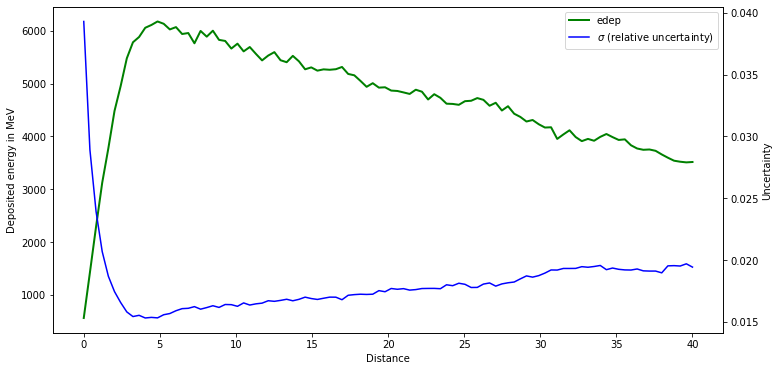

# GATE image output

## 3D DoseActor - format mhd/raw

In [394]:
import SimpleITK as sitk

img_edep = sitk.ReadImage('ex_beam/output/3D-Edep.mhd')
arr_edep = sitk.GetArrayFromImage(img_edep)
print('Image size = ', arr_edep.shape)
print('Image min and max: ',  np.amin(arr_edep), np.amax(arr_edep))

Image size =  (100, 200, 300)
Image min and max:  0.0 143.22406


In [395]:
arr_edep.ndim

3

### Exercise
* make the same plot (depth dose) as previous section with this 3D data
    * hint: you need to make a 1D array from 3D array

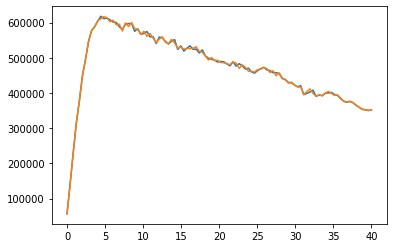

* Open `3D-Edep-Uncertainty`, `3D-Edep-Squared` and recompute `3D-Edep-Uncertainty` from `3D-Edep-Squared`
    * hint: https://github.com/OpenGATE/Gate/blob/develop/source/digits_hits/src/GateImageWithStatistic.cc#L366

In [397]:
img_edep_uncertainty = sitk.ReadImage('ex_beam/output/3D-Edep-Uncertainty.mhd')
arr_edep_uncertainty = sitk.GetArrayFromImage(img_edep_uncertainty)
print('Image size = ', arr_edep_uncertainty.shape)
print('Image min and max: ',  np.amin(arr_edep_uncertainty), np.amax(arr_edep_uncertainty))


img_edep_squared = sitk.ReadImage('ex_beam/output/3D-Edep-Squared.mhd')
arr_edep_squared = sitk.GetArrayFromImage(img_edep_squared)
print('Image size = ', arr_edep_squared.shape)
print('Image min and max: ',  np.amin(arr_edep_squared), np.amax(arr_edep_squared))

Image size =  (100, 200, 300)
Image min and max:  0.07179023 1.0
Image size =  (100, 200, 300)
Image min and max:  0.0 153.42856


In [417]:
#write code here

In [399]:
u = compute_u(arr_edep_squared, arr_edep, 100000)

<ipython-input-398-d40fa9be3889>:2: RuntimeWarning: invalid value encountered in true_divide
  u = np.sqrt(1.0/(N-1)*(squared / N - (mean / N)**2)) / (mean / N)


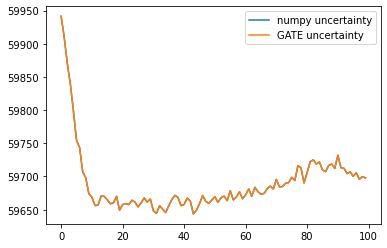

In [401]:
np.allclose(u, arr_edep_uncertainty)

True

## Recompute 3D dose map from hits file ? 

* Modify mac files to make waterbox as crystalSD
* Use fixed seed to make comparison between simulations

Run the GATE with `mac/main_waterboxHits.mac`

In [408]:
cd ex_beam/

/home/mdupont/Documents/DocumentsSync/IR/missions/by_year/2021/2021_03_09_Python GATE School/mathieu/gate-python-training/gate_outputs/ex_beam


In [409]:
!Gate mac/main_waterboxHits.mac

plop
[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecol


hIoni:  for proton  SubType=2
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.05 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50618


hIoni:  for pi+  SubType=2
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.2, 0.05 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=297.505 keV  deltaVI
          BetheBloch : Emin=297.505 keV Emax=  100 TeV  deltaVI

hBrems:  for pi+  SubType=3
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for pi+  SubType=4
      dE/dx and range tables from 10 eV  to 100 TeV in 260 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 20x1001; from 1.11656 GeV 

In [410]:
cd ..

/home/mdupont/Documents/DocumentsSync/IR/missions/by_year/2021/2021_03_09_Python GATE School/mathieu/gate-python-training/gate_outputs


In [411]:
hits = np.load("ex_beam/output/tree_water.hits.npy")
print("Number of particles: ", len(hits))

Number of particles:  3086502


In [412]:
hits.dtype

dtype([('PDGEncoding', '<i4'), ('trackID', '<i4'), ('parentID', '<i4'), ('trackLocalTime', '<f8'), ('time', '<f8'), ('runID', '<i4'), ('eventID', '<i4'), ('sourceID', '<i4'), ('primaryID', '<i4'), ('posX', '<f4'), ('posY', '<f4'), ('posZ', '<f4'), ('localPosX', '<f4'), ('localPosY', '<f4'), ('localPosZ', '<f4'), ('momDirX', '<f4'), ('momDirY', '<f4'), ('momDirZ', '<f4'), ('edep', '<f4'), ('stepLength', '<f4'), ('trackLength', '<f4'), ('rotationAngle', '<f4'), ('axialPos', '<f4'), ('processName', 'S32'), ('comptVolName', 'S32'), ('RayleighVolName', 'S32'), ('volumeID[0]', '<i4'), ('volumeID[1]', '<i4'), ('volumeID[2]', '<i4'), ('volumeID[3]', '<i4'), ('volumeID[4]', '<i4'), ('volumeID[5]', '<i4'), ('volumeID[6]', '<i4'), ('volumeID[7]', '<i4'), ('volumeID[8]', '<i4'), ('volumeID[9]', '<i4'), ('sourcePosX', '<f4'), ('sourcePosY', '<f4'), ('sourcePosZ', '<f4'), ('nPhantomCompton', '<i4'), ('nCrystalCompton', '<i4'), ('nPhantomRayleigh', '<i4'), ('nCrystalRayleigh', '<i4'), ('', '<i4'), ('

Using the `posZ` seems to be the right choice to make

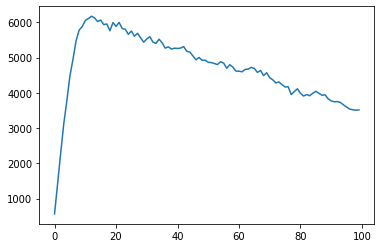

In [413]:
plt.plot(d_edep)

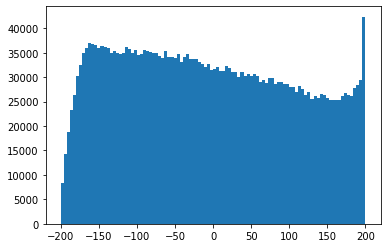

In [414]:
# write code here

How to have same y-scale ? 

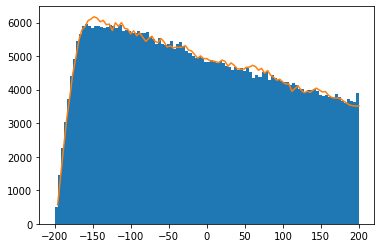

In [416]:
#write code here